### Running Pyspark in Colab
To run spark in Colab, we need to first install all the dependencies in Colab environment i.e. Apache Spark 2.4.4 with hadoop 2.7, Java 8 and Findspark to locate the spark in the system. The tools installation can be carried out inside the Jupyter Notebook of the Colab. One important note is that if you are new in Spark, it is better to avoid Spark 2.4.0 version since some people have already complained about its compatibility issue with python.  Follow the steps to install the dependencies:

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init("spark-2.4.4-bin-hadoop2.7") # SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

Check if Pyspark works well below:

In [0]:
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
df.show(3)

spark-2.4.4-bin-hadoop2.7/python/pyspark/sql/session.py:346: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows



In [0]:
# from google.colab import files
# files.upload()

In [0]:
!ls 

sample_data  spark-2.4.4-bin-hadoop2.7	spark-2.4.4-bin-hadoop2.7.tgz


In [0]:
#!rm  -rf </content/Final.csv>

In [0]:
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!pwd
os.chdir('gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce')
!pwd
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce
Final_order_dataset.csv		  olist_products_dataset.csv
final_order.json		  olist_sellers_dataset.csv
olist_customers_dataset.csv	  product_category_name_translation.csv
olist_geolocation_dataset.csv	  spark-2.4.4-bin-hadoop2.7
olist_order_items_dataset.csv	  spark-2.4.4-bin-hadoop2.7.tgz
olist_order_payments_dataset.csv  spark-2.4.4-bin-hadoop2.7.tgz.1
olist_order_reviews_dataset.c

In [0]:
import os
os.listdir('/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce')

['spark-2.4.4-bin-hadoop2.7.tgz.2',
 'spark-2.4.4-bin-hadoop2.7.tgz',
 'spark-2.4.4-bin-hadoop2.7.tgz.1',
 'spark-2.4.4-bin-hadoop2.7.tgz.3',
 'product_category_name_translation.csv',
 'olist_customers_dataset.csv',
 'olist_sellers_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'spark-2.4.4-bin-hadoop2.7',
 'Final_order_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'final_order.json']

In [0]:
# Import Packages
import pandas as pd
import seaborn as sb

In [0]:
# customers_path = './olist_customers_dataset.csv'
# orders_path = './olist_orders_dataset.csv'
# geolocation_path = './olist_geolocation_dataset.csv'
# product_path = './olist_products_dataset.csv'
# order_items_path = './olist_order_items_dataset.csv'
# sellers_path = './olist_sellers_dataset.csv'
# order_payments_path = './olist_order_payments_dataset.csv'
# category_name_translation_path = './product_category_name_translation.csv'
# order_reviews_path = './olist_order_reviews_dataset.csv'

## In this task, we read our multiple datasets.

In [0]:
df_customers = spark.read.csv("/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/olist_customers_dataset.csv", inferSchema=True, header=True)  ## Unique customer id
df_orders = spark.read.csv("/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/olist_orders_dataset.csv", inferSchema=True, header=True).drop('_c8') ## Unclassified orders dataset
df_geolocation = spark.read.csv("/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/olist_geolocation_dataset.csv", inferSchema=True, header=True)  ## Location data
df_product = spark.read.csv("/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/olist_products_dataset.csv", inferSchema=True, header=True)  ## Products dataset
df_order_items = spark.read.csv("/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/olist_order_items_dataset.csv", inferSchema=True, header=True)  ## Order items dataset
df_sellers = spark.read.csv("/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/olist_sellers_dataset.csv", inferSchema=True, header=True)  ## Seller information
df_order_payments = spark.read.csv("/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/olist_order_payments_dataset.csv", inferSchema=True, header=True)  ## Payment dataset
df_category_name_translation = spark.read.csv("/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/product_category_name_translation.csv", inferSchema=True, header=True)  ## Product translation to english
df_order_reviews = spark.read.csv("/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/olist_order_reviews_dataset.csv", inferSchema=True, header=True)  ## Unclassified orders dataset

In [0]:
# df_orders.show()

In [0]:
# df_order_reviews.show(100)

In [0]:
print "The number of customer:", df_customers.count()
print "The number of order:", df_orders.count()
print "The number of order payments:", df_order_payments.count()
print "The number of order reviews:", df_order_reviews.count()
print "The number of product:", df_product.count()
print "The number of order items:", df_order_items.count()
print "The number of category name translation:", df_category_name_translation.count()
print "The number of sellers:", df_sellers.count()
print "The number of geolocation:", df_geolocation.count()

The number of customer: 99441
The number of order: 99441
The number of order payments: 103886
The number of order reviews: 105189
The number of product: 32951
The number of order items: 112650
The number of category name translation: 71
The number of sellers: 3095
The number of geolocation: 774645


## There are nine datasets we have and we will merge them into one analytical dataset.
### We set several steps to combine them together:
1. Merge customer-related datasets(orders, order_customer, order_review, order_payments).
2. Merge product-related datasets(order_items,products)
3. Merge seller-related datasets(sellers, geolocation)<br>
For geolocation dataset, we will combine it with order_customer and geolocation dataset each. And, when merging them, we add a suffix to geolocatio names. (e.g customer_geolocation_lat, customer_geolocation_lat, seller_geolocation_lat, seller_geolocation_lat)
4. After combining each segmentations, merge customer-related datasets with product-related datasets
5. Finally, merge customer-product related datasets with seller-related datasets<br>
(optional) We could extract weather data from NOAA(National Oceanic
and Atmospheric Administration) and add this dataset by using “date” for a key to merge.

In [0]:
# df_geolocation
# df_product
# df_order_items
# df_sellers
# df_category_name_translation

# df_orders
# df_customers
# df_order_reviews
# df_order_payments

## Now, let's merge step by step

### Step1 Merge customer-related datasets(orders, order_customer, order_review, order_payments).
Here, orders dataset is baseline and merge it with other.
There are four datasets to merge: df_orders, df_customers, df_order_reviews, df_order_payments

### 1. Merge  order_customer with geolocation dataset

In [0]:
from pyspark.sql.functions import desc
df_geolocation.sort(desc("geolocation_zip_code_prefix")).show()


+---------------------------+---------------+---------------+--------------------+-----------------+
|geolocation_zip_code_prefix|geolocation_lat|geolocation_lng|    geolocation_city|geolocation_state|
+---------------------------+---------------+---------------+--------------------+-----------------+
|                      99990|   -28.32959498|   -51.76936176|           muliterno|               RS|
|                      99980|   -28.38912939|   -51.84383599|     david canabarro|               RS|
|                      99970|   -28.34376619|   -51.87468927|             ciriaco|               RS|
|                      99965|   -28.18337204|   -52.03985048|          agua santa|               RS|
|                      99960|   -27.95372179|   -52.02551149|             charrua|               RS|
|                      99955|   -28.11334131|   -52.14384316|        vila langaro|               RS|
|                      99952|   -28.17119882|   -51.90856858|santa cecilia do sul|         

In [0]:
df_geolocation.count()

774645

In [0]:
# There are multiple latitudes and longitudes in same zip codes so it is needed to delete duplicated one.
df_geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix']).count()

19177

In [0]:
new_geolocation = df_geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'])

In [0]:
def add_prefix(sdf, prefix):
      for c in sdf.columns:
          sdf = sdf.withColumnRenamed(c, '{}{}'.format(prefix, c))
      return sdf

new_customer_geolocation = add_prefix(new_geolocation,'customer_')
new_customer_geolocation.show()
new_customer_geolocation.count()

+------------------------------------+------------------------+------------------------+-------------------------+--------------------------+
|customer_geolocation_zip_code_prefix|customer_geolocation_lat|customer_geolocation_lng|customer_geolocation_city|customer_geolocation_state|
+------------------------------------+------------------------+------------------------+-------------------------+--------------------------+
|                                1238|             -23.5425714|            -46.65424333|                sao paulo|                        SP|
|                                2122|            -23.51196609|            -46.58386438|                sao paulo|                        SP|
|                                2142|            -23.51019871|            -46.57671782|                sao paulo|                        SP|
|                                2366|            -23.46773275|             -46.6105451|                sao paulo|                        SP|
|     

19177

In [0]:
# df_customers.show()

In [0]:
# Merge orders dataset and items dataset!!!
customer_geo = df_customers.join(new_customer_geolocation, df_customers.customer_zip_code_prefix == new_customer_geolocation.customer_geolocation_zip_code_prefix, how='left')
customer_geo.show()
customer_geo.count()

+--------------------+--------------------+------------------------+--------------------+--------------+------------------------------------+------------------------+------------------------+-------------------------+--------------------------+
|         customer_id|  customer_unique_id|customer_zip_code_prefix|       customer_city|customer_state|customer_geolocation_zip_code_prefix|customer_geolocation_lat|customer_geolocation_lng|customer_geolocation_city|customer_geolocation_state|
+--------------------+--------------------+------------------------+--------------------+--------------+------------------------------------+------------------------+------------------------+-------------------------+--------------------------+
|06b8999e2fba1a1fb...|861eff4711a542e4b...|                   14409|              franca|            SP|                               14409|            -20.49848876|            -47.39692949|                   franca|                        SP|
|18955e83d337fd6b2..

99441

In [0]:
customer_geo

DataFrame[customer_id: string, customer_unique_id: string, customer_zip_code_prefix: int, customer_city: string, customer_state: string, customer_geolocation_zip_code_prefix: int, customer_geolocation_lat: double, customer_geolocation_lng: double, customer_geolocation_city: string, customer_geolocation_state: string]

In [0]:
# Now, we get merged customer dataset.
customer_geo = customer_geo.drop("customer_geolocation_zip_code_prefix","customer_geolocation_city","customer_geolocation_state")
customer_geo.show()
customer_geo.count()

+--------------------+--------------------+------------------------+--------------------+--------------+------------------------+------------------------+
|         customer_id|  customer_unique_id|customer_zip_code_prefix|       customer_city|customer_state|customer_geolocation_lat|customer_geolocation_lng|
+--------------------+--------------------+------------------------+--------------------+--------------+------------------------+------------------------+
|06b8999e2fba1a1fb...|861eff4711a542e4b...|                   14409|              franca|            SP|            -20.49848876|            -47.39692949|
|18955e83d337fd6b2...|290c77bc529b7ac93...|                    9790|sao bernardo do c...|            SP|            -23.72799222|            -46.54284779|
|4e7b3e00288586ebd...|060e732b5b29e8181...|                    1151|           sao paulo|            SP|            -23.53164158|            -46.65628875|
|b2b6027bc5c5109e5...|259dac757896d24d7...|                    8775|  

99441

### 2. Merge orders dataset with order_customer-geolocation dataset

In [0]:
# customer_geo.show()

In [0]:
# df_orders.show()

In [0]:
print "The number of customer:", customer_geo.count()
print "The number of order:", df_orders.count()

The number of customer: 99441
The number of order: 99441


In [0]:
# Merge orders dataset and customers dataset!!!
# These two datasets are same rows and they have same information because they are both included in order information.
new_customer_geo = df_orders.join(customer_geo, on='customer_id', how='left')
new_customer_geo.show()
new_customer_geo.count()

+--------------------+--------------------+------------+------------------------+-----------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------------------+--------------------+--------------+------------------------+------------------------+
|         customer_id|            order_id|order_status|order_purchase_timestamp|order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|  customer_unique_id|customer_zip_code_prefix|       customer_city|customer_state|customer_geolocation_lat|customer_geolocation_lng|
+--------------------+--------------------+------------+------------------------+-----------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------------------+--------------------+--------------+------------------------+------------------------+
|01d190d14b00073f7...|975a0290ce9c935

99441

In [0]:
print "The number of order reviews:", df_order_reviews.count()
print "The number of new_customer_geo:", new_customer_geo.count()

The number of order reviews: 105189
The number of new_customer_geo: 99441


In [0]:
# Merge orders-customers dataset with order_review!!!
# We use left-join (orders <- order_review) because the orders dataset included more information and the orders dataset is our baseline dataset.
new_customer_geo_review_ = new_customer_geo.join(df_order_reviews, on='order_id', how='left')
new_customer_geo_review_.show()
new_customer_geo_review_.count()

+--------------------+--------------------+------------+------------------------+-----------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------------------+--------------------+--------------+------------------------+------------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+
|            order_id|         customer_id|order_status|order_purchase_timestamp|order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|  customer_unique_id|customer_zip_code_prefix|       customer_city|customer_state|customer_geolocation_lat|customer_geolocation_lng|           review_id|review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|
+--------------------+--------------------+------------+------------------------+-----------------+-------------

100000

In [0]:
# df_order_reviews.show()

In [0]:
df_order_reviews_pdf = df_order_reviews.toPandas()
df_dedupe = df_order_reviews_pdf.drop_duplicates(subset=['order_id'], keep='last', inplace=False)
new_order_reviews = spark.createDataFrame(df_dedupe, ['review_id','order_id','review_score','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'])
new_order_reviews.printSchema()
new_order_reviews.count()

root
 |-- review_id: string (nullable = true)
 |-- order_id: string (nullable = true)
 |-- review_score: string (nullable = true)
 |-- review_comment_title: string (nullable = true)
 |-- review_comment_message: string (nullable = true)
 |-- review_creation_date: string (nullable = true)
 |-- review_answer_timestamp: string (nullable = true)



100563

In [0]:
# There are some problems because the number of row are changing. It has to be same so we look through the order review dataset and find out that there are some duplicated order id that make it hard to merge.
# So, we drop the duplicated review on same order id.
print "Before handling the duplicated rows, the number of order reviews:", df_order_reviews.count()
print "After handling the duplicated rows, the number of order reviews:",new_order_reviews.count()

Before handling the duplicated rows, the number of order reviews: 105189
After handling the duplicated rows, the number of order reviews: 100563


In [0]:
# new_order_reviews = df_order_reviews.drop_duplicates(subset=['order_id'])

In [0]:
# Merge orders-customers dataset with order_review!!!
# We use left-join (orders <- order_review) because the orders dataset included more information and the orders dataset is our baseline dataset.
new_customer_geo_review = new_customer_geo.join(new_order_reviews, on='order_id', how='left')
new_customer_geo_review.show()
new_customer_geo_review.count()

+--------------------+--------------------+------------+------------------------+-----------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------------------+--------------------+--------------+------------------------+------------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+
|            order_id|         customer_id|order_status|order_purchase_timestamp|order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|  customer_unique_id|customer_zip_code_prefix|       customer_city|customer_state|customer_geolocation_lat|customer_geolocation_lng|           review_id|review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|
+--------------------+--------------------+------------+------------------------+-----------------+-------------

99441

### 3. Merge order payment dataset with order_customer_geo_review dataset

In [0]:
# drop the rows in which the payment type shows "not defined"
order_payments = df_order_payments.rdd.filter(lambda s: s[2] != "not_defined")
order_payments.take(1)

[Row(order_id=u'b81ef226f3fe1789b1e8b2acac839d17', payment_sequential=1, payment_type=u'credit_card', payment_installments=8, payment_value=99.33)]

In [0]:
# create a payment type dict in order to create the sparse vector later
payment_type_dict = {"boleto":0,"credit_card":1,"debit_card":2,"voucher":3}

In [0]:
# subset: order_id, total_payment
order_total_payment = order_payments.map(lambda s: (str(s[0]),float(s[4]))).reduceByKey(lambda a,b: a+b)
order_total_payment.take(1)

[('4109e4ec2678abadacc06e7a540fec03', 51.98)]

In [0]:
# return to dataframe
df_order_total_payment = order_total_payment.toDF(["order_id","total_payment"])
df_order_total_payment.count()

99437

In [0]:
from pyspark.mllib.linalg import Vectors, SparseVector

In [0]:
# order_payments.map(lambda s: ((str(s[0]),str(s[2])),float(s[4]))).reduceByKey(lambda a,b:a+b).map(lambda s: (s[0][0],(s[0][1],s[1]))).take(1)

Amount of Transaction SV

In [0]:
# subset: order_id, payment_method_value_sparseVector
def valueSparse(line):
    id_val = []
    for pair in line[1]:
        id_val.append((payment_type_dict[pair[0]],pair[1]))
    id_val = sorted(id_val)
    ids = [x[0] for x in id_val]
    vals = [x[1] for x in id_val]
    return (line[0], SparseVector(4,ids,vals))
order_type_value = order_payments.map(lambda s: ((str(s[0]),str(s[2])),float(s[4]))).reduceByKey(lambda a,b:a+b)\
                            .map(lambda s: (s[0][0],(s[0][1],s[1]))).groupByKey().map(valueSparse)
order_type_value.take(4)

[('fe968a563e6c2d5c98021df7d87ce9c3', SparseVector(4, {1: 318.97})),
 ('4109e4ec2678abadacc06e7a540fec03', SparseVector(4, {1: 51.98})),
 ('7c48bf2308168ce82b8e622eb9dd8627', SparseVector(4, {1: 59.11})),
 ('6b8a860cec63279fe49b5649ca6bab42', SparseVector(4, {0: 85.23}))]

In [0]:
# return to dataframe
df_order_type_value = order_type_value.toDF(["order_id","payment_type_value"])
df_order_type_value.count()

99437

Count of the Transactions SV


In [0]:
# subset: order_id, payment_type_count_sparseVector
order_type_count = order_payments.map(lambda s: ((str(s[0]),str(s[2])),int(s[3]))).reduceByKey(lambda a,b: a+b)\
                            .map(lambda s: (s[0][0],(s[0][1],s[1]))).groupByKey().map(valueSparse)
order_type_count.take(4)

[('fe968a563e6c2d5c98021df7d87ce9c3', SparseVector(4, {1: 10.0})),
 ('4109e4ec2678abadacc06e7a540fec03', SparseVector(4, {1: 3.0})),
 ('7c48bf2308168ce82b8e622eb9dd8627', SparseVector(4, {1: 1.0})),
 ('6b8a860cec63279fe49b5649ca6bab42', SparseVector(4, {0: 1.0}))]

In [0]:
# return to dataframe
df_order_type_count = order_type_count.toDF(["order_id","payment_type_count"])
df_order_type_count.count()

99437

In [0]:
# merge the three dataframes together and get the new order payments
new_order_payments = df_order_total_payment.join(df_order_type_count, on='order_id', how='left')\
                     .join(df_order_type_value, on='order_id', how='left')
new_order_payments.show()
new_order_payments.count()

+--------------------+-------------+------------------+------------------+
|            order_id|total_payment|payment_type_count|payment_type_value|
+--------------------+-------------+------------------+------------------+
|014405982914c2cde...|        78.43|     (4,[1],[7.0])|   (4,[1],[78.43])|
|019886de8f385a39b...|        188.4|     (4,[1],[2.0])|   (4,[1],[188.4])|
|01a6ad782455876aa...|        50.09|     (4,[1],[5.0])|   (4,[1],[50.09])|
|01d907b3e209269e1...|       169.76|    (4,[1],[10.0])|  (4,[1],[169.76])|
|028dc52e12ddda803...|        61.72|     (4,[2],[1.0])|   (4,[2],[61.72])|
|036dd381dfb3ec75e...|        69.14|     (4,[1],[3.0])|   (4,[1],[69.14])|
|03ebfa9712b7dbc70...|        55.78|     (4,[0],[1.0])|   (4,[0],[55.78])|
|0420da8d50a378401...|        74.63|     (4,[1],[1.0])|   (4,[1],[74.63])|
|05afef1c185862cab...|       101.32|     (4,[1],[6.0])|  (4,[1],[101.32])|
|05bef443b85068505...|        79.52|     (4,[1],[7.0])|   (4,[1],[79.52])|
|05d46826bd0fb605d...|   

99437

In [0]:
# Merge orders-customers dataset with order_payments!!!
# We use left-join (orders <- order_review) because the orders dataset included more information and the orders dataset is our baseline dataset.
new_customer = new_customer_geo_review.join(new_order_payments, on='order_id', how='left')
new_customer.show()
new_customer.count()

+--------------------+--------------------+------------+------------------------+-----------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------------------+--------------------+--------------+------------------------+------------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+-------------+------------------+------------------+
|            order_id|         customer_id|order_status|order_purchase_timestamp|order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|  customer_unique_id|customer_zip_code_prefix|       customer_city|customer_state|customer_geolocation_lat|customer_geolocation_lng|           review_id|review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|total_payment|payment_type_count|payment_type_value|
+-------

99441

######################################################################################################

### Step2 Merge product-related datasets(order_items,products)
Here, order_items dataset is baseline and merge it with other. <br>
There are three datasets to merge:  df_order_items, df_product, df_category_name_translation

In [0]:
print "The number of product:", df_product.count()
print "The number of order items:", df_order_items.count()
print "The number of category name translation:", df_category_name_translation.count()

The number of product: 32951
The number of order items: 112650
The number of category name translation: 71


In [0]:
df_category_name_translation.show()

+---------------------+-----------------------------+
|product_category_name|product_category_name_english|
+---------------------+-----------------------------+
|         beleza_saude|                health_beauty|
| informatica_acess...|         computers_accesso...|
|           automotivo|                         auto|
|      cama_mesa_banho|               bed_bath_table|
|     moveis_decoracao|              furniture_decor|
|        esporte_lazer|               sports_leisure|
|           perfumaria|                    perfumery|
| utilidades_domest...|                   housewares|
|            telefonia|                    telephony|
|   relogios_presentes|                watches_gifts|
|    alimentos_bebidas|                   food_drink|
|                bebes|                         baby|
|            papelaria|                   stationery|
| tablets_impressao...|         tablets_printing_...|
|           brinquedos|                         toys|
|       telefonia_fixa|     

In [0]:
# df_order_items.show()

In [0]:
# Merge product dataset and category_name_translation dataset!!!
# Product dataset has more data and category_name_translation dataset is for tranlating Brazillian category name into English.
new_product = df_product.join(df_category_name_translation, on='product_category_name', how='left')
new_product.show()
new_product.count()

+---------------------+--------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+
|product_category_name|          product_id|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_length_cm|product_height_cm|product_width_cm|product_category_name_english|
+---------------------+--------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+
|           perfumaria|1e9e8ef04dbcff454...|                 40|                       287|                 1|             225|               16|               10|              14|                    perfumery|
|                artes|3aa071139cb16b67c...|                 44|                       276|                 1|            1000|               30|           

32951

In [0]:
print "The number of product-category name translation:", new_product.count()
print "The number of order items:", df_order_items.count()

The number of product-category name translation: 32951
The number of order items: 112650


In [0]:
# Merge items dataset and products dataset!!!
new_item = df_order_items.join(new_product, on='product_id', how='left')
new_item.show()
new_item.count()

+--------------------+--------------------+-------------+--------------------+-------------------+------+-------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+
|          product_id|            order_id|order_item_id|           seller_id|shipping_limit_date| price|freight_value|product_category_name|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_length_cm|product_height_cm|product_width_cm|product_category_name_english|
+--------------------+--------------------+-------------+--------------------+-------------------+------+-------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+
|00e4ded51458037ec...|cfbc5b076b3dfaa51...|            1|1660ad786c27fd935..

112650

In [0]:
# new_item.columns

In [0]:
# Drop the product_category_name because we have translated column "product_category_name_english"
new_item = new_item.drop('product_category_name')

In [0]:
# new_item.columns

In [0]:
# Now, we get merged product_item dataset.
new_item.count()
new_item.show()

+--------------------+--------------------+-------------+--------------------+-------------------+------+-------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+
|          product_id|            order_id|order_item_id|           seller_id|shipping_limit_date| price|freight_value|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_length_cm|product_height_cm|product_width_cm|product_category_name_english|
+--------------------+--------------------+-------------+--------------------+-------------------+------+-------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+
|00e4ded51458037ec...|cfbc5b076b3dfaa51...|            1|1660ad786c27fd935...|2017-08-23 10:24:47| 130.0|        38.46|                 25|   

######################################################################################################

### Step3 Merge seller-related datasets(sellers, geolocation)
For geolocation dataset, we will combine it with order_customer and geolocation dataset each. And, when merging them, we add a suffix to geolocatio names. (e.g customer_geolocation_lat, customer_geolocation_lat, seller_geolocation_lat, seller_geolocation_lat)

In [0]:
df_sellers.show()

+--------------------+----------------------+-----------------+------------+
|           seller_id|seller_zip_code_prefix|      seller_city|seller_state|
+--------------------+----------------------+-----------------+------------+
|3442f8959a84dea7e...|                 13023|         campinas|          SP|
|d1b65fc7debc3361e...|                 13844|       mogi guacu|          SP|
|ce3ad9de960102d06...|                 20031|   rio de janeiro|          RJ|
|c0f3eea2e14555b6f...|                  4195|        sao paulo|          SP|
|51a04a8a6bdcb23de...|                 12914|braganca paulista|          SP|
|c240c4061717ac180...|                 20920|   rio de janeiro|          RJ|
|e49c26c3edfa46d22...|                 55325|           brejao|          PE|
|1b938a7ec6ac5061a...|                 16304|        penapolis|          SP|
|768a86e36ad6aae3d...|                  1529|        sao paulo|          SP|
|ccc4bbb5f32a6ab2b...|                 80310|         curitiba|          PR|

In [0]:
df_geolocation.show()

+---------------------------+---------------+---------------+----------------+-----------------+
|geolocation_zip_code_prefix|geolocation_lat|geolocation_lng|geolocation_city|geolocation_state|
+---------------------------+---------------+---------------+----------------+-----------------+
|                       1001|   -23.55018978|   -46.63402356|       sao paulo|               SP|
|                       1002|   -23.54814573|   -46.63497921|       sao paulo|               SP|
|                       1003|   -23.54899372|   -46.63573131|       sao paulo|               SP|
|                       1004|   -23.54979884|   -46.63475694|       sao paulo|               SP|
|                       1005|    -23.5494562|   -46.63673295|       sao paulo|               SP|
|                       1006|   -23.55010181|   -46.63613674|       são paulo|               SP|
|                       1007|    -23.5500462|   -46.63725146|       sao paulo|               SP|
|                       1008| 

In [0]:
print "The number of sellers:", df_sellers.count()
print "The number of geolocation:", df_geolocation.count()

The number of sellers: 3095
The number of geolocation: 774645


In [0]:
def add_prefix(sdf, prefix):
      for c in sdf.columns:
          sdf = sdf.withColumnRenamed(c, '{}{}'.format(prefix, c))
      return sdf

In [0]:
new_seller_geolocation = add_prefix(new_geolocation,'seller_')
new_seller_geolocation.show()
new_seller_geolocation.count()

+----------------------------------+----------------------+----------------------+-----------------------+------------------------+
|seller_geolocation_zip_code_prefix|seller_geolocation_lat|seller_geolocation_lng|seller_geolocation_city|seller_geolocation_state|
+----------------------------------+----------------------+----------------------+-----------------------+------------------------+
|                              1238|           -23.5425714|          -46.65424333|              sao paulo|                      SP|
|                              2122|          -23.51196609|          -46.58386438|              sao paulo|                      SP|
|                              2142|          -23.51019871|          -46.57671782|              sao paulo|                      SP|
|                              2366|          -23.46773275|           -46.6105451|              sao paulo|                      SP|
|                              2866|          -23.46768213|          -46.680

19177

In [0]:
# Merge orders dataset and items dataset!!!
new_seller = df_sellers.join(new_seller_geolocation, df_sellers.seller_zip_code_prefix == new_seller_geolocation.seller_geolocation_zip_code_prefix, how='left')
new_seller.show()
new_seller.count()

+--------------------+----------------------+-----------------+------------+----------------------------------+----------------------+----------------------+-----------------------+------------------------+
|           seller_id|seller_zip_code_prefix|      seller_city|seller_state|seller_geolocation_zip_code_prefix|seller_geolocation_lat|seller_geolocation_lng|seller_geolocation_city|seller_geolocation_state|
+--------------------+----------------------+-----------------+------------+----------------------------------+----------------------+----------------------+-----------------------+------------------------+
|3442f8959a84dea7e...|                 13023|         campinas|          SP|                             13023|          -22.89384803|          -47.06133702|               campinas|                      SP|
|d1b65fc7debc3361e...|                 13844|       mogi guacu|          SP|                             13844|          -22.38343651|          -46.94792654|             mo

3095

In [0]:
new_seller.drop("seller_geolocation_zip_code_prefix","seller_geolocation_city","seller_geolocation_state").show()

+--------------------+----------------------+-----------------+------------+----------------------+----------------------+
|           seller_id|seller_zip_code_prefix|      seller_city|seller_state|seller_geolocation_lat|seller_geolocation_lng|
+--------------------+----------------------+-----------------+------------+----------------------+----------------------+
|3442f8959a84dea7e...|                 13023|         campinas|          SP|          -22.89384803|          -47.06133702|
|d1b65fc7debc3361e...|                 13844|       mogi guacu|          SP|          -22.38343651|          -46.94792654|
|ce3ad9de960102d06...|                 20031|   rio de janeiro|          RJ|          -22.90957244|          -43.17770311|
|c0f3eea2e14555b6f...|                  4195|        sao paulo|          SP|          -23.65724198|          -46.61283084|
|51a04a8a6bdcb23de...|                 12914|braganca paulista|          SP|          -22.96480278|          -46.53441931|
|c240c4061717ac1

In [0]:
# Now, we get merged seller dataset.
new_seller = new_seller.drop("seller_geolocation_zip_code_prefix","seller_geolocation_city","seller_geolocation_state")
new_seller.show()
new_seller.count()

+--------------------+----------------------+-----------------+------------+----------------------+----------------------+
|           seller_id|seller_zip_code_prefix|      seller_city|seller_state|seller_geolocation_lat|seller_geolocation_lng|
+--------------------+----------------------+-----------------+------------+----------------------+----------------------+
|3442f8959a84dea7e...|                 13023|         campinas|          SP|          -22.89384803|          -47.06133702|
|d1b65fc7debc3361e...|                 13844|       mogi guacu|          SP|          -22.38343651|          -46.94792654|
|ce3ad9de960102d06...|                 20031|   rio de janeiro|          RJ|          -22.90957244|          -43.17770311|
|c0f3eea2e14555b6f...|                  4195|        sao paulo|          SP|          -23.65724198|          -46.61283084|
|51a04a8a6bdcb23de...|                 12914|braganca paulista|          SP|          -22.96480278|          -46.53441931|
|c240c4061717ac1

3095

######################################################################################################

In [0]:
print "The number of customer section dataset: :", new_customer.count()
print "The number of product section dataset: :", new_item.count()
print "The number of seller section dataset: :", new_seller.count()

The number of customer section dataset: : 99441
The number of product section dataset: : 112650
The number of seller section dataset: : 3095


In [0]:
# Merge orders dataset and items dataset!!!
customer_product_group = new_customer.join(new_item, on='order_id', how='inner') # Left-join
customer_product_group.show()
customer_product_group.count()

+--------------------+--------------------+------------+------------------------+-----------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------------------+--------------------+--------------+------------------------+------------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+-------------+------------------+------------------+--------------------+-------------+--------------------+-------------------+------+-------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+
|            order_id|         customer_id|order_status|order_purchase_timestamp|order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|  customer_unique_id|customer_zip_code_prefix|       

112650

In [0]:
# Merge order items dataset and sellers dataset!!!
final_order1 = customer_product_group.join(new_seller, on='seller_id', how='left')
final_order1.show()
final_order1.count()

from pyspark.sql.functions import monotonically_increasing_id 

final_order2 = final_order1.select("*").withColumn("id", monotonically_increasing_id())

final_order2.show()
final_order2.count()

+--------------------+--------------------+--------------------+------------+------------------------+-----------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------------------+---------------+--------------+------------------------+------------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+-------------+-------------------+--------------------+--------------------+-------------+-------------------+-----+-------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+----------------------+-----------+------------+----------------------+----------------------+
|           seller_id|            order_id|         customer_id|order_status|order_purchase_timestamp|order_approved_at|order_delivered_carrier_date|o

112650

In [0]:
final_order2.printSchema()

root
 |-- seller_id: string (nullable = true)
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- order_approved_at: string (nullable = true)
 |-- order_delivered_carrier_date: string (nullable = true)
 |-- order_delivered_customer_date: string (nullable = true)
 |-- order_estimated_delivery_date: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: integer (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)
 |-- customer_geolocation_lat: double (nullable = true)
 |-- customer_geolocation_lng: double (nullable = true)
 |-- review_id: string (nullable = true)
 |-- review_score: string (nullable = true)
 |-- review_comment_title: string (nullable = true)
 |-- review_comment_message: string (nullable = true)
 |-- review_creation_date: string (null

## Let's change the data type!!

In [0]:
import pyspark.sql.functions as F
#final_order2.withColumn("order_purchase_timestamp",.to_timestamp("order_purchase_timestamp", "yyyy/MM/dd HHmm")).show()

final_order2.withColumn('order_purchase_timestamp', F.to_timestamp('order_purchase_timestamp', format='MM/dd/yyyy HH:mm')).show()

+--------------------+--------------------+--------------------+------------+------------------------+-----------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------------------+---------------+--------------+------------------------+------------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+-------------+-------------------+--------------------+--------------------+-------------+-------------------+-----+-------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+----------------------+-----------+------------+----------------------+----------------------+---+
|           seller_id|            order_id|         customer_id|order_status|order_purchase_timestamp|order_approved_at|order_delivered_carrier_da

In [0]:
from pyspark.sql.functions import to_timestamp
final_order3 = final_order2.withColumn("review_creation_date", F.to_timestamp("review_creation_date", format='MM/dd/yyyy HH:mm'))\
                           .withColumn("review_answer_timestamp", F.to_timestamp("review_answer_timestamp", format='MM/dd/yyyy HH:mm'))\
                           .withColumn("order_purchase_timestamp", F.to_timestamp("order_purchase_timestamp", format='MM/dd/yyyy HH:mm'))\
                           .withColumn("order_approved_at", F.to_timestamp("order_approved_at", format='MM/dd/yyyy HH:mm'))\
                           .withColumn("order_delivered_carrier_date", F.to_timestamp("order_delivered_carrier_date", format='MM/dd/yyyy HH:mm'))\
                           .withColumn("order_delivered_customer_date", F.to_timestamp("order_delivered_customer_date", format='MM/dd/yyyy HH:mm'))\
                           .withColumn("order_estimated_delivery_date", F.to_timestamp("order_estimated_delivery_date", format='MM/dd/yyyy HH:mm'))

In [0]:
# ## change all date to TimeStampType
# from pyspark.sql.functions import to_timestamp
# final_order3 = final_order2.withColumn("review_creation_date", to_timestamp("review_creation_date", "yyyy-MM-dd HH:mm:ss").cast("timestamp"))\
#                            .withColumn("review_answer_timestamp", to_timestamp("review_answer_timestamp", "yyyy-MM-dd HH:mm:ss").cast("timestamp"))\
#                            .withColumn("order_purchase_timestamp", to_timestamp("order_purchase_timestamp", "yyyy-MM-dd HH:mm:ss").cast("timestamp"))\
#                            .withColumn("order_approved_at", to_timestamp("order_approved_at", "yyyy-MM-dd HH:mm:ss").cast("timestamp"))\
#                            .withColumn("order_delivered_carrier_date", to_timestamp("order_delivered_carrier_date", "yyyy-MM-dd HH:mm:ss").cast("timestamp"))\
#                            .withColumn("order_delivered_customer_date", to_timestamp("order_delivered_customer_date", "yyyy-MM-dd HH:mm:ss").cast("timestamp"))\
#                            .withColumn("order_estimated_delivery_date", to_timestamp("order_estimated_delivery_date", "yyyy-MM-dd HH:mm:ss").cast("timestamp"))

In [0]:
final_order3.show()

+--------------------+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------------------+---------------+--------------+------------------------+------------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+-------------+-------------------+--------------------+--------------------+-------------+-------------------+-----+-------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+----------------------+-----------+------------+----------------------+----------------------+---+
|           seller_id|            order_id|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrie

In [0]:
## change "review score" to IntegerType
from pyspark.sql.types import IntegerType
final_order = final_order3.withColumn("review_score", final_order3["review_score"].cast(IntegerType()))

In [0]:
final_order.printSchema()

root
 |-- seller_id: string (nullable = true)
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: timestamp (nullable = true)
 |-- order_approved_at: timestamp (nullable = true)
 |-- order_delivered_carrier_date: timestamp (nullable = true)
 |-- order_delivered_customer_date: timestamp (nullable = true)
 |-- order_estimated_delivery_date: timestamp (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: integer (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)
 |-- customer_geolocation_lat: double (nullable = true)
 |-- customer_geolocation_lng: double (nullable = true)
 |-- review_id: string (nullable = true)
 |-- review_score: integer (nullable = true)
 |-- review_comment_title: string (nullable = true)
 |-- review_comment_message: string (nullable = true)
 |-- review_creation_da

In [0]:
x = pd.DataFrame(final_order.take(5), columns=final_order.columns).transpose()

In [0]:
# # # All data will be written to mydata.csv/part-00000.
# final_order.coalesce(1).write.option("header", "true").csv("/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/final_order.csv")
# This code does not work well.

In [0]:
# This code does not work well.
# final_order.toPandas().to_csv(r"/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/final_order.csv", index=False)

In [0]:
# total_group = seller_group.join(df_customers, on='customer_id', how='inner')
# total_group.show()
# total_group.count()

## Let's save a merged Pyspark Datafram into a json file.
In every work, it is very hard to run all the codes so we save one file and perform analysis after read the merged file.

In [0]:
# Save final_order into a json file
final_order.coalesce(1).write.format('json').save("/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/final_order.json")

## Exploratory data analysis (Feature Engineering)
- Preparing Data for Machine Learning

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. It is fundamental to the application of machine learning and helps in increasing the accuracy of the model. It is really essential in creating the right features.I will be using Random Forest Regressor model for this data. So, I split the date into discrete components so the decision trees were able to make better guesses.

Let's look through it deeply. 80 percent of a data scientist's valuable time is spent simply finding, cleansing, and organizing data, leaving only 20 percent to actually perform analysis. According to this part, our analysis can be more accurate and build better models.

In [0]:
# Column Data Type
final_order.dtypes

[('seller_id', 'string'),
 ('order_id', 'string'),
 ('customer_id', 'string'),
 ('order_status', 'string'),
 ('order_purchase_timestamp', 'timestamp'),
 ('order_approved_at', 'timestamp'),
 ('order_delivered_carrier_date', 'timestamp'),
 ('order_delivered_customer_date', 'timestamp'),
 ('order_estimated_delivery_date', 'timestamp'),
 ('customer_unique_id', 'string'),
 ('customer_zip_code_prefix', 'int'),
 ('customer_city', 'string'),
 ('customer_state', 'string'),
 ('customer_geolocation_lat', 'double'),
 ('customer_geolocation_lng', 'double'),
 ('review_id', 'string'),
 ('review_score', 'int'),
 ('review_comment_title', 'string'),
 ('review_comment_message', 'string'),
 ('review_creation_date', 'timestamp'),
 ('review_answer_timestamp', 'timestamp'),
 ('total_payment', 'double'),
 ('payment_type_count', 'vector'),
 ('payment_type_value', 'vector'),
 ('product_id', 'string'),
 ('order_item_id', 'int'),
 ('shipping_limit_date', 'timestamp'),
 ('price', 'double'),
 ('freight_value', 'dou

In [0]:
print final_order.columns ## Column Names
print "Row Count: ", final_order.count() ## Row Count
print "Column Count: ", len(final_order.columns) ## Column Count

['seller_id', 'order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'customer_geolocation_lat', 'customer_geolocation_lng', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'total_payment', 'payment_type_count', 'payment_type_value', 'product_id', 'order_item_id', 'shipping_limit_date', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'seller_geolocation_lat', 'seller_geolocation_lng', 'id']
Row Count:  112650
Column Count:  43


In [0]:
final_order.printSchema()

root
 |-- seller_id: string (nullable = true)
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: timestamp (nullable = true)
 |-- order_approved_at: timestamp (nullable = true)
 |-- order_delivered_carrier_date: timestamp (nullable = true)
 |-- order_delivered_customer_date: timestamp (nullable = true)
 |-- order_estimated_delivery_date: timestamp (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: integer (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)
 |-- customer_geolocation_lat: double (nullable = true)
 |-- customer_geolocation_lng: double (nullable = true)
 |-- review_id: string (nullable = true)
 |-- review_score: integer (nullable = true)
 |-- review_comment_title: string (nullable = true)
 |-- review_comment_message: string (nullable = true)
 |-- review_creation_da

### Descriptive Statistical Analysis
Let's first take a look at the variables by utilizing a description method.

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

- the count of that variable
- the mean
- the standard deviation (std)
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value

In [0]:
numeric_features = [t[0] for t in final_order.dtypes if t[1] == 'double' or t[1] == 'integer']
final_order.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
customer_geolocation_lat,112650,-21.21992533847974,5.574039609879069,-33.68994828,42.18400274
customer_geolocation_lng,112650,-46.203226463476,4.036948604018708,-72.66888054,-8.723762148
total_payment,112647,180.28118556197697,272.84904163378735,9.59,13664.08
price,112650,120.65373901464702,183.6339280502594,0.85,6735.0
freight_value,112650,19.990319928983574,15.806405412297078,0.0,409.68
seller_geolocation_lat,112650,-22.795608138677814,2.698151382289217,-32.07923134,-2.501242201
seller_geolocation_lng,112650,-47.23479047073684,2.3376753319136028,-67.81328447,-34.85561616


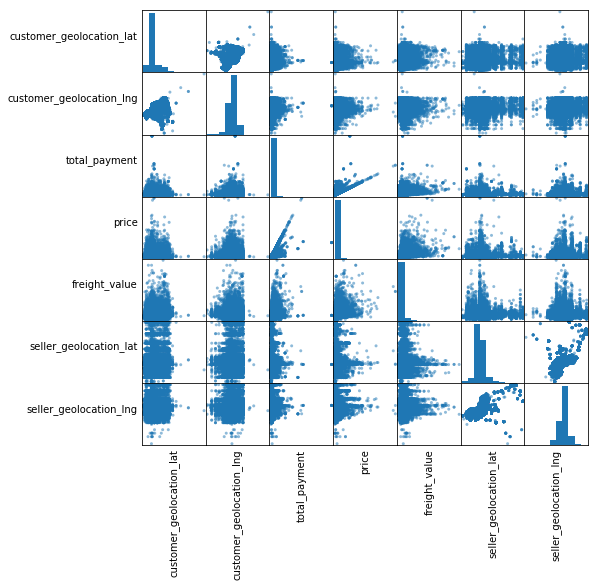

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
numeric_data = final_order.select(numeric_features).toPandas()

axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));

# Rotate axis labels and remove axis ticks
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())
plt.show()

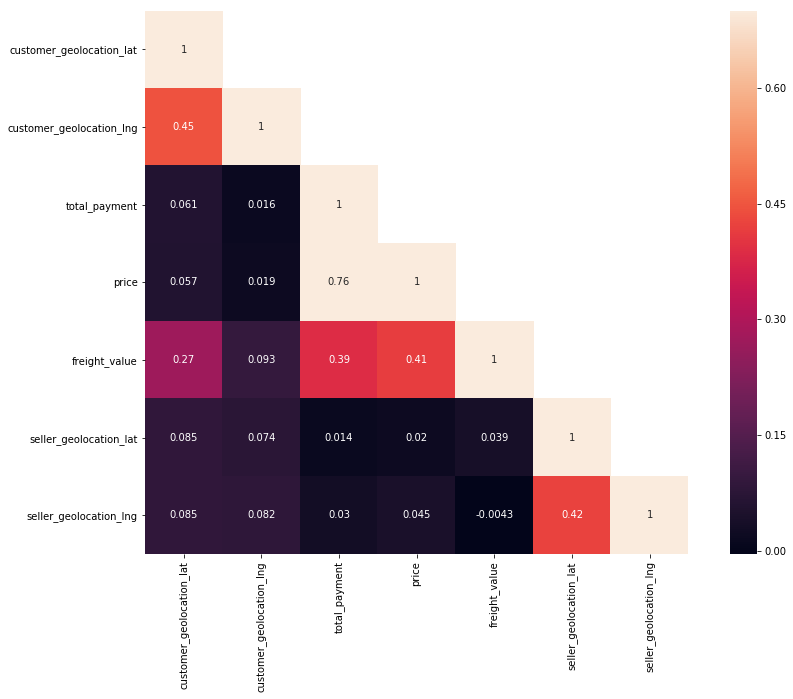

In [0]:
import numpy as np
import seaborn as sns
correlation_map = numeric_data[numeric_data.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)
# fig.savefig("1.png")

### Data visualization

In [0]:
final_order.show(4)

+--------------------+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------------------+-------------+--------------+------------------------+------------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+-------------+-------------------+--------------------+--------------------+-------------+-------------------+-----+-------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+----------------------+-----------+------------+----------------------+----------------------+---+
|           seller_id|            order_id|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_

In [0]:
final_order.select('review_score').show(2)

+------------+
|review_score|
+------------+
|           5|
|           5|
+------------+
only showing top 2 rows



In [0]:
# This is for RDD plot
# from pyspark_dist_explore import hist
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# hist(ax, final_order, bins = 20, color=['red'])

In [0]:
# convert spark dataframe to pandas for visualization

In [0]:
# import pyspark.sql.functions as F
# import pyspark.sql as SQL
# win = SQL.Window.partitionBy('column_of_values')

In [0]:
final_order_df=final_order.toPandas()

In [0]:
# plt.hist(final_order_df['review_score'])
# plt.show()

In [0]:
final_order.describe('review_score').show()

+-------+------------------+
|summary|      review_score|
+-------+------------------+
|  count|            112650|
|   mean| 4.015685752330226|
| stddev|1.3999405323402154|
|    min|                 1|
|    max|                 5|
+-------+------------------+



In [0]:
final_order_df.head()

,seller_id,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,total_payment,payment_type_count,payment_type_value,product_id,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,id
0,062ce95fa2ad4dfaedfc79260130565f,b6fa6ea37aeeb90c905eb2a488fc5dc5,e2dc0b0cef178179300195205e3788ef,delivered,2017-04-24 10:31:00,2017-04-25 08:02:00,2017-05-02 11:30:00,2017-05-22 16:07:00,2017-05-25,4f308d513ccac2840ecef09e3f27834f,72457,brasilia,DF,-16.022947,-48.050718,11bbc10384b40b673a6101cbd773d39f,5,None,None,None,None,100.91,"(1.0, 0.0, 0.0, 0.0)","(100.91, 0.0, 0.0, 0.0)",8a4505505378c8f5d983f3201e9c25da,1,2017-05-04 08:02:25,79.9,21.01,47.0,1400.0,1.0,325.0,19.0,20.0,18.0,health_beauty,95913,lajeado,RS,-29.44658,-51.961202,0
1,062ce95fa2ad4dfaedfc79260130565f,87a838f48767365e2b786c485ef2e8b0,60c9723c5d232b784f10940175deb500,delivered,2017-03-16 16:16:00,2017-03-16 16:16:00,2017-03-21 16:08:00,2017-03-28 16:04:00,2017-04-06,6b3b92110c5adfe4a1334369d1ef2533,89705,concordia,SC,-27.230909,-52.045481,654815c89e61741545d8e7d17e277f2b,5,None,Adorei o produto e chegou super rapido.,None,None,56.42,"(0.0, 1.0, 0.0, 0.0)","(0.0, 56.42, 0.0, 0.0)",cd82271424be9568801391194697361c,1,2017-03-22 16:16:02,41.9,14.52,56.0,999.0,1.0,400.0,19.0,13.0,15.0,bed_bath_table,95913,lajeado,RS,-29.44658,-51.961202,1
2,062ce95fa2ad4dfaedfc79260130565f,8afd15d26436c60441bf3ee71d2a91a8,65d631d0de3181168bc5699f5c766861,delivered,2017-08-29 23:59:00,2017-08-31 02:35:00,2017-09-29 21:04:00,2017-10-05 21:29:00,2017-09-26,78fcceb499ec9008fcecbaad21efefc6,15804,catanduva,SP,-21.121028,-48.970818,a112a50d46519520d8b243b98ec21ca4,3,None,None,None,None,59.82,"(1.0, 0.0, 0.0, 0.0)","(59.82, 0.0, 0.0, 0.0)",cd82271424be9568801391194697361c,1,2017-09-06 02:35:21,41.9,17.92,56.0,999.0,1.0,400.0,19.0,13.0,15.0,bed_bath_table,95913,lajeado,RS,-29.44658,-51.961202,2
3,062ce95fa2ad4dfaedfc79260130565f,1a494062b68a8ed99ba9171cb9c9aef5,8ac1fe94e53325560257c8758c9a8f4a,delivered,2017-05-12 09:09:00,2017-05-12 09:25:00,2017-05-18 12:12:00,2017-05-21 12:51:00,2017-06-01,ec81d1c881757b8d02f24f7a3da1a1d9,88102,sao jose,SC,-27.595808,-48.616197,48fe29ff7afb01dc5420dd679a48ef1a,5,None,Gostaria apenas que a empresa que me enviou o ...,None,None,57.00,"(0.0, 2.0, 0.0, 1.0)","(0.0, 40.22, 0.0, 16.78)",4da0329350218978429b287440f4b87a,1,2017-05-18 09:25:07,41.9,15.10,63.0,683.0,1.0,400.0,21.0,5.0,15.0,furniture_decor,95913,lajeado,RS,-29.44658,-51.961202,3
4,062ce95fa2ad4dfaedfc79260130565f,288ec48ad5ea4c98afe99ea53d523b78,fec424751aa87f5451286fc3d532fae4,delivered,2017-06-18 14:27:00,2017-06-20 10:43:00,2017-06-26 14:48:00,2017-06-29 17:09:00,2017-07-07,e8a195f60d266e458b02b0e57e85815d,95320,nova prata,RS,-28.782255,-51.609213,9009e7e25f6a8e4588f0a8b43297d9d1,5,None,None,None,None,54.38,"(1.0, 0.0, 0.0, 0.0)","(54.38, 0.0, 0.0, 0.0)",4da0329350218978429b287440f4b87a,1,2017-06-26 10:43:46,41.9,12.48,63.0,683.0,1.0,400.0,21.0,5.0,15.0,furniture_decor,95913,lajeado,RS,-29.44658,-51.961202,4


In [0]:
final_order_df.isnull().sum() # check the missing values

seller_id                             0
order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date       1192
order_delivered_customer_date      2446
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
customer_geolocation_lat              0
customer_geolocation_lng              0
review_id                             0
review_score                          0
review_comment_title              99047
review_comment_message            64296
review_creation_date             112650
review_answer_timestamp          112650
total_payment                         3
payment_type_count                    3
payment_type_value                    3
product_id                            0


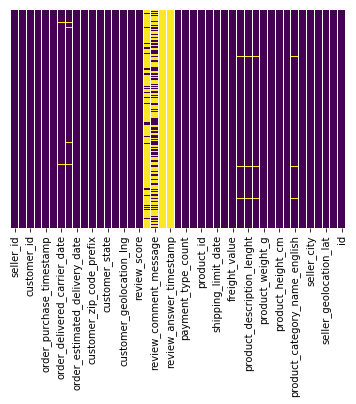

In [0]:
import seaborn as sb
sb.heatmap(final_order_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
final_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 43 columns):
seller_id                        112650 non-null object
order_id                         112650 non-null object
customer_id                      112650 non-null object
order_status                     112650 non-null object
order_purchase_timestamp         112650 non-null datetime64[ns]
order_approved_at                112650 non-null datetime64[ns]
order_delivered_carrier_date     111458 non-null datetime64[ns]
order_delivered_customer_date    110204 non-null datetime64[ns]
order_estimated_delivery_date    112650 non-null datetime64[ns]
customer_unique_id               112650 non-null object
customer_zip_code_prefix         112650 non-null int32
customer_city                    112650 non-null object
customer_state                   112650 non-null object
customer_geolocation_lat         112650 non-null float64
customer_geolocation_lng         112650 non-null float64
review_i

In [0]:
missing_data = final_order_df.isnull()
missing_data.head(5)

,seller_id,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,total_payment,payment_type_count,payment_type_value,product_id,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,id
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

seller_id
False    112650
Name: seller_id, dtype: int64

order_id
False    112650
Name: order_id, dtype: int64

customer_id
False    112650
Name: customer_id, dtype: int64

order_status
False    112650
Name: order_status, dtype: int64

order_purchase_timestamp
False    112650
Name: order_purchase_timestamp, dtype: int64

order_approved_at
False    112650
Name: order_approved_at, dtype: int64

order_delivered_carrier_date
False    111458
True       1192
Name: order_delivered_carrier_date, dtype: int64

order_delivered_customer_date
False    110204
True       2446
Name: order_delivered_customer_date, dtype: int64

order_estimated_delivery_date
False    112650
Name: order_estimated_delivery_date, dtype: int64

customer_unique_id
False    112650
Name: customer_unique_id, dtype: int64

customer_zip_code_prefix
False    112650
Name: customer_zip_code_prefix, dtype: int64

customer_city
False    112650
Name: customer_city, dtype: int64

customer_state
False    112650
Name: customer_state, dty

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

In [0]:
# from pyspark.mllib.stat import Statistics 
# import pandas as pd

# corr_data = final_order.select(numeric_features)
# col_names = corr_data.columns
# features = corr_data.rdd.map(lambda row: row[0:]) 
# corr_mat=Statistics.corr(features, method="pearson") 
# corr_df = pd.DataFrame(corr_mat)
# corr_df.index, corr_df.columns = col_names, col_names
# print(corr_df.to_string())

In [0]:
# df = corr_data.toPandas()

In [0]:
# df.corr()

############################################################

############################################################

## Advanced Analytics

### Clustering for seller geolocation

#### Step 1 - assemble your features
In contrast to most ML packages out there, Spark ML requires your input features to be gathered in a single column of your dataframe, usually named features; and it provides a specific method for doing this, VectorAssembler:

In [0]:
final_order.columns

['seller_id',
 'order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'customer_geolocation_lat',
 'customer_geolocation_lng',
 'review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'total_payment',
 'payment_type_count',
 'payment_type_value',
 'product_id',
 'order_item_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_category_name_english',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state',
 'seller_geolocation_lat',
 'seller_geolocation_lng',
 'id']

In [0]:
#Step 1 - assemble your features
from pyspark.ml.feature import VectorAssembler

vecAssembler = VectorAssembler(inputCols=['seller_geolocation_lat','seller_geolocation_lng'], outputCol="features")
final_order_seller_geo = vecAssembler.transform(final_order)
final_order_seller_geo.show()

+--------------------+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------------------+---------------+--------------+------------------------+------------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+-------------+-------------------+--------------------+--------------------+-------------+-------------------+-----+-------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+----------------------+-----------+------------+----------------------+----------------------+---+--------------------+
|           seller_id|            order_id|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|o

As perhaps already guessed, the argument inputCols serves to tell VectoeAssembler which particular columns in our dataframe are to be used as features.

#### Step 2 - fit your KMeans model

In [0]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=2, seed=1)  # 2 clusters here
model = kmeans.fit(final_order_seller_geo.select('features'))

#### Step 3 - transform your initial dataframe to include cluster assignments

In [0]:
transformed = model.transform(final_order_seller_geo)
transformed.show(3) 

+--------------------+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------------------+-------------+--------------+------------------------+------------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+-------------+------------------+------------------+--------------------+-------------+-------------------+-----+-------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+----------------------+-----------+------------+----------------------+----------------------+---+--------------------+----------+
|           seller_id|            order_id|         customer_id|order_status|order_purchase_timestamp|  order_approve

In [0]:
transformed.select('product_weight_g','product_length_cm','product_height_cm').show(4) 

+----------------+-----------------+-----------------+
|product_weight_g|product_length_cm|product_height_cm|
+----------------+-----------------+-----------------+
|             325|               19|               20|
|             400|               19|               13|
|             400|               19|               13|
|             400|               21|                5|
+----------------+-----------------+-----------------+
only showing top 4 rows



In [0]:
## Checking the Elbow Point (WSSSE)
for k in range(2,9):
    kmeans = KMeans(featuresCol='features',k=k)
    model = kmeans.fit(final_order_seller_geo.select('features'))
    wssse = model.computeCost(final_order_seller_geo.select('features'))
    print("With K={}".format(k))
    print("Within Set Sum of Squared Errors = " + str(wssse))
    print('--'*30)

With K=2
Within Set Sum of Squared Errors = 1114229.85455
------------------------------------------------------------
With K=3
Within Set Sum of Squared Errors = 618116.635384
------------------------------------------------------------
With K=4
Within Set Sum of Squared Errors = 593031.932187
------------------------------------------------------------
With K=5
Within Set Sum of Squared Errors = 301734.424906
------------------------------------------------------------
With K=6
Within Set Sum of Squared Errors = 234601.889043
------------------------------------------------------------
With K=7
Within Set Sum of Squared Errors = 206496.120802
------------------------------------------------------------
With K=8
Within Set Sum of Squared Errors = 246181.780819
------------------------------------------------------------


In [0]:
kmeans_seller_geo = KMeans(featuresCol='features',k=7)

model_seller_geo = kmeans_seller_geo.fit(final_order_seller_geo.select('features'))
 
wssse_seller_geo = model_seller_geo.computeCost(final_order_seller_geo.select('features'))
 
print("With K=7")
print("Within Set Sum of Squared Errors = " + str(wssse_seller_geo))
print('--'*30)

With K=7
Within Set Sum of Squared Errors = 206496.120802
------------------------------------------------------------


In [0]:
model_seller_geo.transform(final_order_seller_geo.select('features')).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|60435|
|         6| 7969|
|         3| 2370|
|         5|21977|
|         4| 6339|
|         2| 1627|
|         0|11933|
+----------+-----+



In [0]:
from pyspark.ml.clustering import KMeans
#from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans().setK(7)
model = kmeans.fit(final_order_seller_geo.select('features'))
transformed = model.transform(final_order_seller_geo).drop('features')

In [0]:
transformed.filter(transformed.prediction==1).show(5)

+--------------------+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------------------+---------------+--------------+------------------------+------------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+-------------+------------------+------------------+--------------------+-------------+-------------------+-----+-------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+-----------------------------+----------------------+-----------+------------+----------------------+----------------------+---+----------+
|           seller_id|            order_id|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivere

In [0]:
from pyspark.sql.functions import mean
transformed.filter(transformed.prediction==0).select(mean("product_weight_g")).alias("Mean prodcut weight").show()

+---------------------+
|avg(product_weight_g)|
+---------------------+
|    2341.580910081287|
+---------------------+



In [0]:
# from pyspark.sql.functions import col, when

# transformed.filter(transformed.prediction==0).groupBy("product_weight_g") \
#     .count() \
#     .orderBy(col("count").desc()) \
#     .show(20,False)

In [0]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[-21.30689508 -43.72837261]
[-23.39998282 -46.69969132]
[ -8.0619754 -38.8286642]
[-29.55234991 -51.38153851]
[-23.25984071 -52.07440369]
[-20.9170938  -48.65642006]
[-26.25136307 -49.25616261]


Let's make maps through using clusters

In [0]:
import folium
from folium.plugins import MarkerCluster

/usr/local/lib/python2.7/dist-packages/folium/__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


In [0]:
#create map of São Paulo in Brazil using latitude and longitude values
map_brazil = folium.Map(location=[-23.5505,-46.6333], zoom_start=12)
map_brazil

In [0]:
# marker_pos1=[-21.30689508 -43.72837261]
# marker_pos2=[-23.39998282 -46.69969132]
# marker_pos3=[ -8.0619754 -38.8286642]
# marker_pos4=[-29.55234991 -51.38153851]
# marker_pos5=[-23.25984071 -52.07440369]
# marker_pos6=[-20.9170938  -48.65642006]
# marker_pos7=[-26.25136307 -49.25616261]

In [0]:
# folium.Marker(location=marker_pos1,popup='cluster1').add_to(map_brazil)
# folium.Marker(location=marker_pos2,popup='cluster2').add_to(map_brazil)
# folium.Marker(location=marker_pos3,popup='cluster3').add_to(map_brazil)
# folium.Marker(location=marker_pos4,popup='cluster4').add_to(map_brazil)
# folium.Marker(location=marker_pos5,popup='cluster5').add_to(map_brazil)
# folium.Marker(location=marker_pos6,popup='cluster6').add_to(map_brazil)
# folium.Marker(location=marker_pos7,popup='cluster7').add_to(map_brazil)
# map_brazil

############################################################

############################################################

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [0]:
dataset.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [0]:
#Input all the features in one vector column
assembler = VectorAssembler(inputCols=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'], outputCol = 'Attributes')

output = assembler.transform(dataset)

#Input vs Output
finalized_data = output.select("Attributes","medv")

finalized_data.show()

+--------------------+----+
|          Attributes|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [0]:
#Split training and testing data
train_data,test_data = finalized_data.randomSplit([0.8,0.2])

regressor = LinearRegression(featuresCol = 'Attributes', labelCol = 'medv')

#Learn to fit the model from training set
regressor = regressor.fit(train_data)

#To predict the prices on testing set
pred = regressor.evaluate(test_data)

#Predict the model
pred.predictions.show()

+--------------------+----+------------------+
|          Attributes|medv|        prediction|
+--------------------+----+------------------+
|[0.01778,95.0,1.4...|32.9|30.765967808979674|
|[0.01951,17.5,1.3...|33.0|23.117907707478118|
|[0.01965,80.0,1.7...|20.1|20.154636048510746|
|[0.02177,82.5,2.0...|42.3| 37.06108717853176|
|[0.03445,82.5,2.0...|24.1|29.295662958601966|
|[0.03551,25.0,4.8...|22.9|25.224390367839884|
|[0.03768,80.0,1.5...|34.6|34.420614518327326|
|[0.04301,80.0,1.9...|18.2|14.621294713458092|
|[0.04544,0.0,3.24...|19.8|  21.5222770416463|
|[0.04932,33.0,2.1...|28.2| 32.83086162058804|
|[0.05083,0.0,5.19...|22.2| 22.32355029570804|
|[0.05372,0.0,13.9...|27.1|27.252205508464705|
|[0.05425,0.0,4.05...|24.6|29.168128450227123|
|[0.05561,70.0,2.2...|29.0|31.922352596394262|
|[0.05602,0.0,2.46...|50.0|   35.889406456653|
|[0.05646,0.0,12.8...|21.2| 21.16208545947244|
|[0.06076,0.0,11.9...|23.9|27.875146617328248|
|[0.06127,40.0,6.4...|33.1| 34.35117364912485|
|[0.06129,20.

In [0]:
#coefficient of the regression model
coeff = regressor.coefficients

#X and Y intercept
intr = regressor.intercept

print ("The coefficient of the model is : %a" %coeff)
print ("The Intercept of the model is : %f" %intr)

The coefficient of the model is : DenseVector([-0.1219, 0.0492, 0.0263, 1.9728, -17.9692, 3.658, -0.0004, -1.5255, 0.3104, -0.0127, -0.8997, 0.0054, -0.567])
The Intercept of the model is : 38.784359


In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="medv", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)

RMSE: 4.351
MSE: 18.931
MAE: 3.052
r2: 0.784


### Sales Analysis

#### 1. New product categories each month

In [0]:
sales_analysis = final_order.select('seller_id', 'order_id', 'customer_id','order_purchase_timestamp'\
                                    ,'customer_unique_id','total_payment','payment_type_count','payment_type_value'\
                                    ,'product_id','order_item_id','price','freight_value','product_category_name_english','id')
# sales_analysis.show()

In [0]:
from pyspark.sql.functions import year, month, dayofmonth

In [0]:
sales_analysis = sales_analysis.select('seller_id', 'order_id', 'customer_id','customer_unique_id','total_payment','payment_type_count','payment_type_value'\
                      ,'product_id','order_item_id','price','freight_value','product_category_name_english','id'\
                      ,year("order_purchase_timestamp").alias('year'), month("order_purchase_timestamp").alias('month')\
                      , dayofmonth("order_purchase_timestamp").alias('day'))

In [0]:
sales_rdd = sales_analysis.rdd

In [0]:
product_cate_M1 = sales_rdd.map(lambda s: ((s[13],s[14],s[11]),1)).reduceByKey(lambda a,b: a+b)
product_cate_M2 = product_cate_M1.map(lambda s: ((s[0][0],s[0][1]),s[0][2])).groupByKey().map(lambda s: (s[0],[str(i) for i in s[1]]))
product_cate_list = product_cate_M2.collect()

In [0]:
product_cate_list.sort()

In [0]:
product_delta = {}
for i in range(len(product_cate_list)):
    n = 0
    m = product_cate_list[i][0]
    if i == 0:
        n = len(product_cate_list[i][1])
    if i != 0:
        for x in product_cate_list[i][1]:
            if x not in product_cate_list[i-1][1]:
                n += 1
            if x in product_cate_list[i-1][1]:
                n = n
    product_delta.update({m:n})

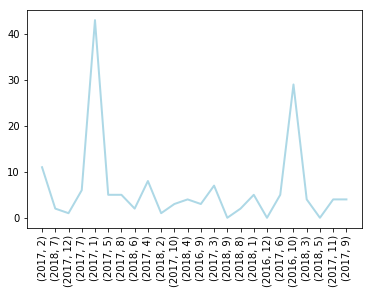

In [0]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([i for i in range(len(product_delta))])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.array(product_delta.values()), color='lightblue', linewidth=2)
plt.xticks(x, product_delta.keys(), rotation = 90)
# ax.set_xlim(0.5, 4.5)
plt.show()

#### 2. Increase of Seller Each Month

In [0]:
sellers_M1 = sales_rdd.map(lambda s: ((s[13],s[14],s[0]),1)).reduceByKey(lambda a,b: a+b)
sellers_M2 = sellers_M1.map(lambda s: ((s[0][0],s[0][1]),s[0][2])).groupByKey().map(lambda s: (s[0],[str(i) for i in s[1]]))
sellers_list = sellers_M2.collect()

In [0]:
sellers_list.sort()

In [0]:
sellers_delta = {}
for i in range(len(sellers_list)):
    n = 0
    m = sellers_list[i][0]
    if i == 0:
        n = len(sellers_list[i][1])
    if i != 0:
        for x in sellers_list[i][1]:
            if x not in sellers_list[i-1][1]:
                n += 1
            if x in sellers_list[i-1][1]:
                n = n
    sellers_delta.update({m:n})

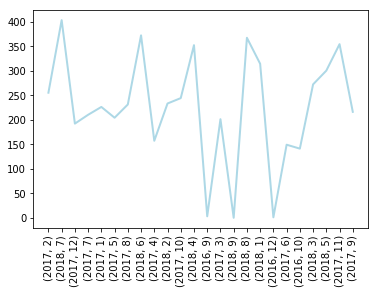

In [0]:
x = np.array([i for i in range(len(sellers_delta))])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.array(sellers_delta.values()), color='lightblue', linewidth=2)
plt.xticks(x, sellers_delta.keys(), rotation = 90)
# ax.set_xlim(0.5, 4.5)
plt.show()

#### 3. Categories purchased at high frequency in each year

In [0]:
product_cate_freq = sales_rdd.map(lambda s: ((s[13],str(s[11])),1)).reduceByKey(lambda a,b: a+b)
product_cate_freq.take(1)

[((2018, 'housewares'), 4046)]

In [0]:
product_cate_freq_DF = product_cate_freq.map(lambda s: (s[0][0],s[0][1],s[1])).toDF(["year","product","number"])
product_cate_freq_DF.show()

+----+--------------------+------+
|year|             product|number|
+----+--------------------+------+
|2018|          housewares|  4046|
|2016|fashion_male_clot...|     1|
|2017|kitchen_dining_la...|   120|
|2016|       fashion_shoes|     1|
|2016|    air_conditioning|    10|
|2018|costruction_tools...|   160|
|2017| luggage_accessories|   598|
|2016|     books_technical|     1|
|2018|           perfumery|  1636|
|2018|       watches_gifts|  3703|
|2017| musical_instruments|   282|
|2016|computers_accesso...|    21|
|2016|      bed_bath_table|     8|
|2018|                toys|  1488|
|2017|        home_confort|   278|
|2017|           telephony|  2198|
|2016|         electronics|     2|
|2018|construction_tool...|   795|
|2017|               music|    11|
|2016|                auto|    12|
+----+--------------------+------+
only showing top 20 rows



In [0]:
product_cate_freq_DF_2016 = product_cate_freq_DF.filter(product_cate_freq_DF.year == 2016)
product_cate_freq_DF_2017 = product_cate_freq_DF.filter(product_cate_freq_DF.year == 2017)
product_cate_freq_DF_2018 = product_cate_freq_DF.filter(product_cate_freq_DF.year == 2018)

In [0]:
blank_product_cate = new_product.select("product_category_name_english").distinct()

In [0]:
product_cate_freq_df_2016 = blank_product_cate.join(product_cate_freq_DF_2016, product_cate_freq_DF_2016.product == blank_product_cate.product_category_name_english, how='left')
product_cate_freq_df_2017 = blank_product_cate.join(product_cate_freq_DF_2017, product_cate_freq_DF_2017.product == blank_product_cate.product_category_name_english, how='left')
product_cate_freq_df_2018 = blank_product_cate.join(product_cate_freq_DF_2018, product_cate_freq_DF_2018.product == blank_product_cate.product_category_name_english, how='left')
product_cate_freq_df_2016.count()

72

In [0]:
product_cate_freq_new_2016 = product_cate_freq_df_2016.drop("product").withColumnRenamed('product_category_name_english', 'product_cate').sort('product_cate', ascending=True)
product_cate_freq_new_2017 = product_cate_freq_df_2017.drop("product").withColumnRenamed('product_category_name_english', 'product_cate').sort('product_cate', ascending=True)
product_cate_freq_new_2018 = product_cate_freq_df_2018.drop("product").withColumnRenamed('product_category_name_english', 'product_cate').sort('product_cate', ascending=True)

In [0]:
product_cate_freq_new_2018.show()

+--------------------+----+------+
|        product_cate|year|number|
+--------------------+----+------+
|                null|null|  null|
|agro_industry_and...|2018|   151|
|    air_conditioning|2018|   157|
|                 art|2018|   168|
|arts_and_craftman...|2018|    22|
|               audio|2018|   195|
|                auto|2018|  2619|
|                baby|2018|  1776|
|      bed_bath_table|2018|  5884|
|books_general_int...|2018|   316|
|      books_imported|2018|    44|
|     books_technical|2018|   222|
|   cds_dvds_musicals|2018|     1|
|  christmas_supplies|2018|    90|
|          cine_photo|2018|    64|
|           computers|2018|    74|
|computers_accesso...|2018|  4708|
|      consoles_games|2018|   420|
|construction_tool...|2018|   795|
|construction_tool...|2018|   286|
+--------------------+----+------+
only showing top 20 rows



In [0]:
product_cate_freq_pd_2016 = product_cate_freq_new_2016.toPandas()
product_cate_freq_pd_2017 = product_cate_freq_new_2017.toPandas()
product_cate_freq_pd_2018 = product_cate_freq_new_2018.toPandas()

In [0]:
column = 

In [0]:
product_cate_freq_pd_2016[column]

In [0]:
len(product_cate_freq_pd_2016)

72

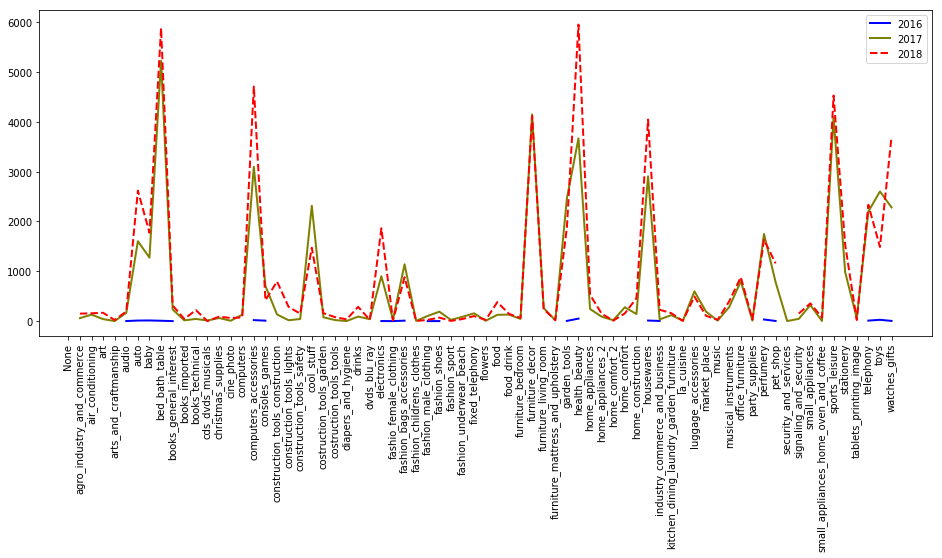

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([i for i in range(len(product_cate_freq_pd_2016))])
plt.figure(figsize=(16,6))
plt.plot( x, 'number', data=product_cate_freq_pd_2016, marker='', color='blue', linewidth=2, label = 2016)
plt.plot( x, 'number', data=product_cate_freq_pd_2017, marker='', color='olive', linewidth=2, label = 2017)
plt.plot( x, 'number', data=product_cate_freq_pd_2018, marker='', color='red', linewidth=2, linestyle='dashed', label=2018)
plt.xticks(x, product_cate_freq_pd_2018.product_cate, rotation = 90)
plt.legend()


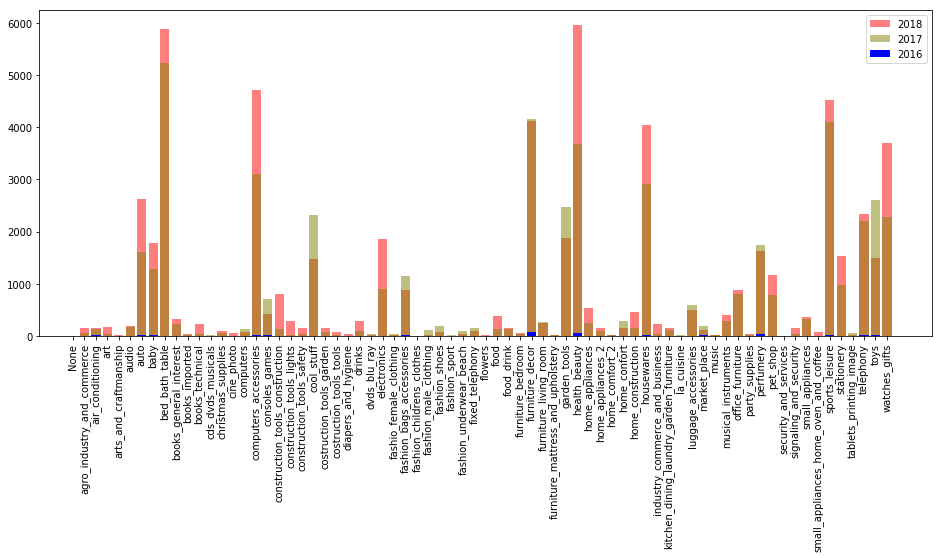

In [0]:
x = np.array([i for i in range(len(product_cate_freq_pd_2016))])
plt.figure(figsize=(16,6))
p1 = plt.bar( x, 'number', data=product_cate_freq_pd_2018, color='red', linewidth=2, alpha=0.5, label=2018)
p2 = plt.bar( x, 'number', data=product_cate_freq_pd_2017, color='olive', linewidth=2, alpha=0.5, label = 2017)
p3 = plt.bar( x, 'number', data=product_cate_freq_pd_2016, color='blue', linewidth=2, label = 2016)
plt.xticks(x, product_cate_freq_pd_2018.product_cate, rotation = 90)
plt.legend((p1[0], p2[0], p3[0]), (2018, 2017, 2016))

#### 

#### 4. Which two products always bought together (coupon? set?) in/ not in each seller

In [0]:
sales_basket = sales_rdd.map(lambda s: (s[1], s[7])).groupByKey().map(lambda s:list(s[1]))
sales_basket.count()

98666

In [0]:
sales_basket.take(5)

[[u'37c4c3f162a9549087175b1391df2f02'],
 [u'3d36ef6c6d553500f4240920658689e3'],
 [u'776c13784f928afbe46070ae0151cf01'],
 [u'dfc090f5e254f365893c76a73809d9f7'],
 [u'5fec075d001fba20a6bdeeb5d9b22dbe']]

In [0]:
def delete_1(s):
  if len(s) == 1:
    return s, "F"
  if len(s) >= 2:
    return s, "T"
sales_basket_2 = sales_basket.map(delete_1).filter(lambda s: s[1] == "T").map(lambda s: s[0])
sales_basket_2.take(2)

[[u'70cd303f8e2dc6c00f5908aa72acdea6', u'3dcb77af8b9587985d046b195e105475'],
 [u'dbb67791e405873b259e4656bf971246', u'dbb67791e405873b259e4656bf971246']]

In [0]:
def pair(s):
    lst=[]
    for i in range(0, len(s)-1):
        for j in range(i+1, len(s)):
            lst.append((s[i],s[j]))
    return lst
            
twoProFreq = sales_basket_2.map(pair).flatMap(lambda x: x).map(lambda p: [p,1])
print twoProFreq.take(5)

[[(u'70cd303f8e2dc6c00f5908aa72acdea6', u'3dcb77af8b9587985d046b195e105475'), 1], [(u'dbb67791e405873b259e4656bf971246', u'dbb67791e405873b259e4656bf971246'), 1], [(u'ddb9028236525b8ab493fc24f99e8d1a', u'e61c78a7343d82c0539d27df0f7dfc31'), 1], [(u'5c7dfdd3e6d851f08d3cfe8213747ff5', u'f3d1c2c26a2b8f3398af192dfdef56be'), 1], [(u'd5e17af4e0c9b0def251a1c9d2b0eaa2', u'd5e17af4e0c9b0def251a1c9d2b0eaa2'), 1]]


In [0]:
twoProFreq_agg = twoProFreq.reduceByKey(lambda a,b: a+b).sortBy(lambda x: x[1], ascending = False)

In [0]:
twoProFreq_agg.take(3)

[((u'422879e10f46682990de24d770e7f83d', u'422879e10f46682990de24d770e7f83d'),
  279),
 ((u'ee3d532c8a438679776d222e997606b3', u'ee3d532c8a438679776d222e997606b3'),
  195),
 ((u'9571759451b1d780ee7c15012ea109d4', u'9571759451b1d780ee7c15012ea109d4'),
  190)]

In [0]:
from pyspark.sql.functions import col

freqTwoPro_sorted = twoProFreq_agg.filter(lambda x: x[1]>100).sortBy(lambda x: x[1], ascending = False)

# Each line is converted to a tuple.
freqTwoProTuples = freqTwoPro_sorted.map(lambda p: (p[0][0], p[0][1], p[1]))

# The schema is encoded in a string.

freqTwoProDF = freqTwoProTuples.toDF(["product_id_1", "product_id_2", "frequency"])
product_info = new_product.select("product_id","product_category_name_english")
freqTwoProDF1 = freqTwoProDF.join(product_info, freqTwoProDF.product_id_1==product_info.product_id, how='left').drop("product_id").withColumnRenamed("product_category_name_english","product_cate_1")
freqTwoProDF2 = freqTwoProDF1.join(product_info, freqTwoProDF.product_id_2==product_info.product_id, how='left').drop("product_id").withColumnRenamed("product_category_name_english","product_cate_2")

print "The frequent product pairs are as follow."
print freqTwoProDF2.show(50)

The frequent product pairs are as follow.
+--------------------+--------------------+---------+--------------------+--------------------+
|        product_id_1|        product_id_2|frequency|      product_cate_1|      product_cate_2|
+--------------------+--------------------+---------+--------------------+--------------------+
|d5991653e037ccb7a...|d5991653e037ccb7a...|      123|computers_accesso...|computers_accesso...|
|89b190a046022486c...|89b190a046022486c...|      115|     furniture_decor|     furniture_decor|
|aca2eb7d00ea1a7b8...|aca2eb7d00ea1a7b8...|      111|     furniture_decor|     furniture_decor|
|389d119b48cf3043d...|389d119b48cf3043d...|      108|        garden_tools|        garden_tools|
|53759a2ecddad2bb8...|53759a2ecddad2bb8...|      119|        garden_tools|        garden_tools|
|b532349fe46b38fbc...|b532349fe46b38fbc...|      134|     furniture_decor|     furniture_decor|
|ee3d532c8a4386797...|ee3d532c8a4386797...|      195|computers_accesso...|computers_accesso...

In [0]:
# Not Work
# from pyspark.mllib.fpm import FPGrowth
# model = FPGrowth.train(sales_basket_2, minSupport=0.05, numPartitions=10)   #minSupport=times/total baskets number

# result = model.freqItemsets().collect()
# print('---------------------------')
# for fi in result:
#     print(fi)

#### 5. Tendency of payment method

##### According to Payment Amount

In [0]:
payment_type_B_amount = sales_rdd.map(lambda s:[(s[13],s[14]),s[6]])
payment_type_B_amount.take(1)

[[(2017, 4), SparseVector(4, {0: 100.91})]]

In [0]:
payment_type_B_amount.filter(lambda s: s[0] == (2016, 9)).take(10)

[[(2016, 9), None],
 [(2016, 9), None],
 [(2016, 9), None],
 [(2016, 9), SparseVector(4, {1: 136.23})],
 [(2016, 9), SparseVector(4, {1: 136.23})],
 [(2016, 9), SparseVector(4, {1: 75.06})]]

In [0]:
from pyspark.mllib.linalg import SparseVector, DenseVector

def aggreList(a,b):
  if a == []:
    A = [0.0,0.0,0.0,0.0]
  if a != []:
    A = a
  if b == []:
    B = [0.0,0.0,0.0,0.0]
  if b != []:
    B = b
  k = []
  for i in range(len(A)):
    k.append(A[i]+B[i])
  return k
payment_type_B_amount_agg = payment_type_B_amount.map(lambda s: [s[0],list([i for i in DenseVector(s[1])])]).reduceByKey(aggreList)
payment_type_B_amount_agg.take(2)

[((2017, 10),
  [205895.31999999986, 787627.77, 6105.260000000002, 21540.920000000006]),
 ((2016, 9), [0.0, 347.52, 0.0, 0.0])]

In [0]:
payment_type_B_amount_sort = payment_type_B_amount_agg.sortByKey()
payment_type_B_amount_sort.take(5)

[((2016, 9), [0.0, 347.52, 0.0, 0.0]),
 ((2016, 10), [13981.390000000001, 58874.380000000005, 241.73, 817.08]),
 ((2016, 12), [0.0, 19.62, 0.0, 0.0]),
 ((2017, 1),
  [33013.729999999996, 148538.17999999996, 788.19, 5439.310000000001]),
 ((2017, 2),
  [72366.67999999998,
   263399.30999999994,
   1664.0400000000002,
   6704.760000000001])]

In [0]:
# "boleto":0,"credit_card":1,"debit_card":2,"voucher":3
month = payment_type_B_amount_sort.map(lambda s: s[0]).collect()
boleto = payment_type_B_amount_sort.map(lambda s: s[1][0]).collect()
credit_card = payment_type_B_amount_sort.map(lambda s: s[1][1]).collect()
debit_card = payment_type_B_amount_sort.map(lambda s: s[1][2]).collect()
voucher = payment_type_B_amount_sort.map(lambda s: s[1][3]).collect()

In [0]:
import matplotlib.pyplot as plt
import numpy as np

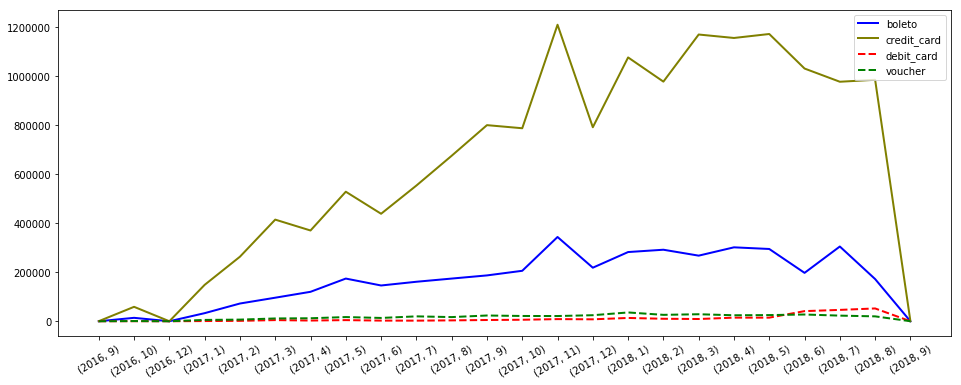

In [0]:
x = np.array([i for i in range(len(month))])
plt.figure(figsize=(16,6))
plt.plot( x, boleto, marker='', color='blue', linewidth=2, label = "boleto")
plt.plot( x, credit_card, marker='', color='olive', linewidth=2, label = "credit_card")
plt.plot( x, debit_card, marker='', color='red', linewidth=2, linestyle='dashed', label="debit_card")
plt.plot( x, voucher, marker='', color='green', linewidth=2, linestyle='dashed', label="voucher")
plt.xticks(x, month, rotation = 30)
plt.legend()